## Light Gradient Boosting Model

In [1]:
# to run lgbm, we need to install it to our computer:

# pip install lightgbm

## 1. Load files

In [1]:
# Import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataframe:

df = pd.read_csv('./data/P5clean.csv')

## 2. Modeling

In [3]:
# Preprocessing

X = df.drop(columns=['life_ladder', 'country_name', 'year', 'overall_score'])
y = df.life_ladder

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [4]:
# Instantiate LGBM Regressor

model = lgb.LGBMRegressor(boosting_type='gbdt',
                          learning_rate=0.05,
                          max_depth=3,
                          num_leaves=2
                          )

m = model.fit(X_train, y_train)

In [5]:
# Let's predict the happiness:

lgb_pred = m.predict(X_test)

In [6]:
# Let's look at the scores:
# There is no coef for gradient boosting models

print(f'train score:{m.score(X_train, y_train)}')
print(f'test score: {m.score(X_test, y_test)}')
print('----------------------------------------')
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('MAE', mean_absolute_error(y_test,lgb_pred))
print(f'R2: {metrics.r2_score(y_test, lgb_pred)}')

train score:0.7905332280747003
test score: 0.7673948805235722
----------------------------------------
MSE: 0.2925741990692513
MAE 0.42550964519970386
R2: 0.7673948805235722


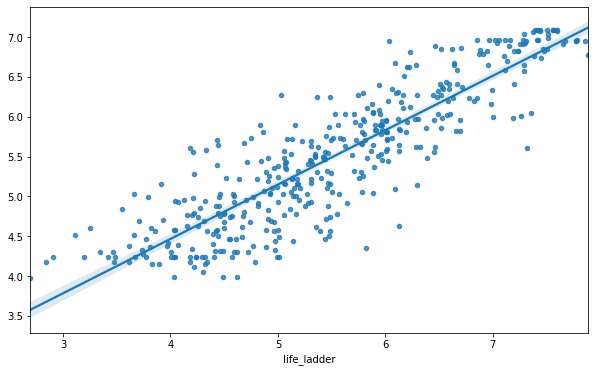

In [7]:
# Plot the model

plt.figure(figsize=(10,6))
sns.regplot(y_test, lgb_pred, scatter_kws={"s": 20});

In [2]:
# Following parameters could be changed for future experimentrations

# params = {}
# params['learning_rates'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['metric'] = 'mse'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 10
# params['min_data'] = 50
# params['max_depth'] = 10

# # Train model on train dataset with 25 iterations:
# clf = lgb.train(params, d_train, 25)